# Exercises for the CNA lab {-}


# Exercise \#1
- Load the igraph library and the rest of the "useful stuff"
- Create a text file with 10 nodes, connected as you wish
- load the file into an igraph Graph object
- check that the obtained igraph object correctly describes your dataset
- plot the graph

In [1]:
# interactive plots in Jupyter, used to show plots inline in the notebook
%matplotlib inline

# The igraph library
from igraph import *

# Numpy for enhanced math array management
import numpy as np

# statistical tools (we only use ECDF)
from statsmodels.distributions.empirical_distribution import ECDF

# Mathematical plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# use to control whether to show the entire cell output or only the last_expr (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to generate random numbers
from random import *

IGRAPH DNW- 10 11 -- 
+ attr: color (v), name (v), weight (e)
+ edges (vertex names):
        edge     weight
[0]    10->20     0.100
[1]    10->30     0.300
[2]    10->40     0.010
[3]    10->50     0.500
[4]    20->50         1
[5]    30->40     0.900
[6]    50->60     0.200
[7]    70->10     0.300
[8]    80->70     0.020
[9]    80->30     0.100
[10]   90->100        1


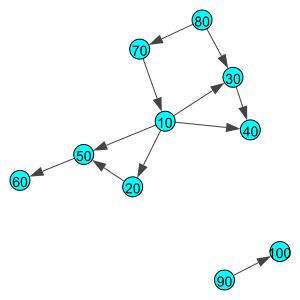

In [2]:
ex_g = read("./exercise_graph.ncol", format = "ncol", directed = True)
ex_g.vs["color"] = "cyan"
summary(ex_g, verbosity = 1, edge_list_format = "edgelist")

# Plot the graph
layout = ex_g.layout_fruchterman_reingold()
plot(ex_g, layout = layout, vertex_label = ex_g.vs["name"], bbox = (300,300))

## Exercise #2
- analyse the components structure, and extract the Giant Component

2

[8, 2]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

IGRAPH DNW- 8 10 -- 
+ attr: color (v), name (v), weight (e)
+ edges (vertex names):
       edge    weight
[0]   10->20    0.100
[1]   10->30    0.300
[2]   10->40    0.010
[3]   10->50    0.500
[4]   20->50        1
[5]   30->40    0.900
[6]   50->60    0.200
[7]   70->10    0.300
[8]   80->70    0.020
[9]   80->30    0.100


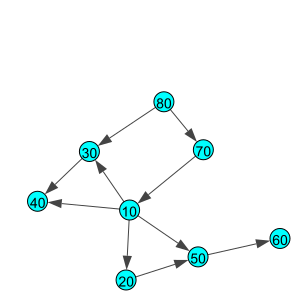

In [4]:
# Compute the connected components in the graph
ex_g_conn_comp = ex_g.components(mode = "WEAK")
# the number of components
len(ex_g_conn_comp)
# the sizes of the clusters
ex_g_conn_comp.sizes()
# the membership of vertices in the clusters
ex_g_conn_comp.membership

# the Giant Componet (the biggest cluster)
ex_g_GC = ex_g_conn_comp.giant()
summary(ex_g_GC, verbosity = 1, edge_list_format = "edgelist")
plot(ex_g_GC, layout = ex_g.layout_fruchterman_reingold(), vertex_label = ex_g_GC.vs["name"], bbox = (300,300))

## Exercise #3

- Load the DBLP graph from the file ca-dblp-2010.mtx (undirected, ncol format)
    - FYI, DBLP is a graph of scientific co-authorship, based on the DBLP database https://dblp.org/
- Print the number of nodes and edges, and the summary of the GC
- plot both the **density** and the **CCDF** of the degree distribution in **both** lin-lin **and** log-log scales
- **NOTE: the graph is connected, so there is only one GC, otherwise the analysis would have been done on the GC only**

Number of nodes in DBLP:  226413
Number of edges in DBLP:  716460
IGRAPH UN-- 226413 716460 -- 
+ attr: name (v)
+ edges (vertex names):
         edge   
[0]    2--1     
[1]    1--4757  
[2]    4--3     
[3]    3--17    
[4]    3--97770 
[5]    3--226015
[6]    6--5     
[7]    5--7     
[8]    5--18    
[9]    7--18    
[10]   9--8     
[11]   8--10    
[12]   8--19    
[13]   9--10    
[14]   9--11    
[15]   9--19    
[16]   9--21920 
[17]   10--11   
[18]   10--19   
[19]   10--18437
[20]   10--18449
[21]   10--18453
[22]   10--18470
[23]   10--21920
[24]   11--12   


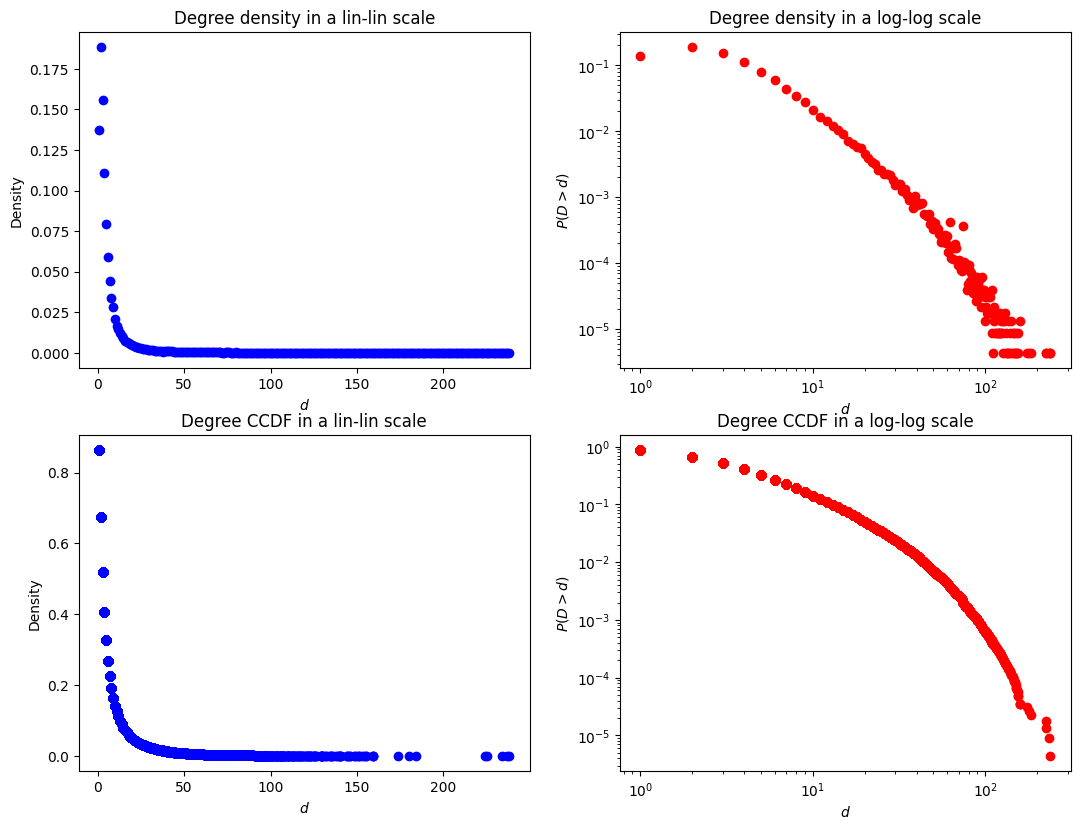

In [5]:
# load the file
dblp_g = read("./ca-dblp-2010.mtx", format = "ncol", directed = False)
print("Number of nodes in DBLP: ", dblp_g.vcount())
print("Number of edges in DBLP: ", dblp_g.ecount())
summary(dblp_g, verbosity = 1, max_rows = 25, edge_list_format = "edgelist")

# compute the degrees
dblp_deg = dblp_g.degree(mode="all")

# prepare the plot areas
# we plan for 4 plots
default_sizes = plt.rcParams["figure.figsize"]
fig_sizes = (2*default_sizes[0], 2*default_sizes[1])

# generate a figure with 4 subplots, organised in 2 rows and 2 columns
# ax1, ax2, ax3 and ax4 ("axes") are used to access the individual plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = fig_sizes)

# density
dd_h, dd_h_bins = np.histogram(dblp_deg, bins=range(1,max(dblp_deg)+2), density=True)

# lin-lin
_ = ax1.plot(dd_h_bins[:-1], dd_h, 'bo')
_ = ax1.set_xlabel("$d$")
_ = ax1.set_ylabel("Density")
_ = ax1.set_title("Degree density in a lin-lin scale")

# log-log
_ = ax2.loglog(dd_h_bins[:-1], dd_h, 'ro')
_ = ax2.set_xlabel("$d$")
_ = ax2.set_ylabel("$P(D>d)$")
_ = ax2.set_title("Degree density in a log-log scale")



# CCDF
dblp_cdf = ECDF(dblp_deg)

# lin-lin
_ = ax3.plot(dblp_deg, 1-dblp_cdf(dblp_deg), 'bo')
_ = ax3.set_xlabel("$d$")
_ = ax3.set_ylabel("Density")
_ = ax3.set_title("Degree CCDF in a lin-lin scale")

# plot it
_ = ax4.loglog(dblp_deg, 1-dblp_cdf(dblp_deg), 'ro')
_ = ax4.set_xlabel("$d$")
_ = ax4.set_ylabel("$P(D>d)$")
_ = ax4.set_title("Degree CCDF in a log-log scale")

## Exercise #4
- Fit the CCDF of the degree distribution by generating the equivalent Random Graph (exponential fitting) and Fixed Power Law graph (power law fitting)

226014

226413

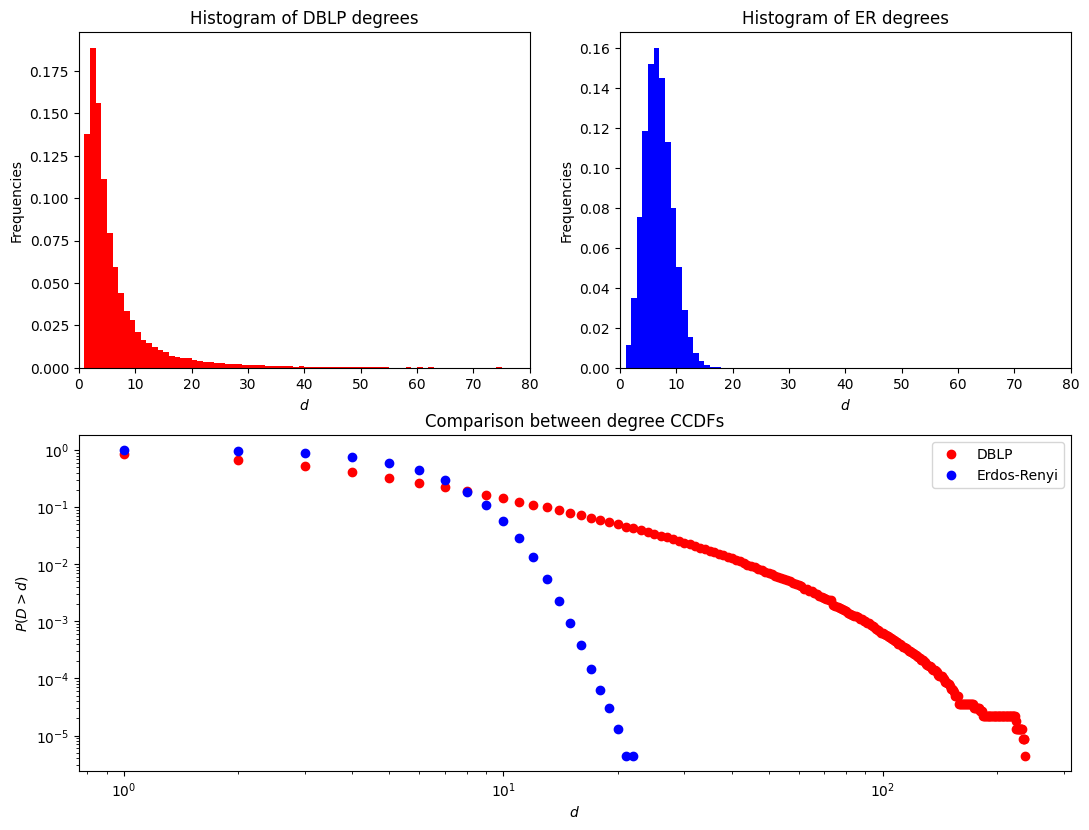

In [7]:
# Now we compare the degree distributions for the complete fb Giant Component
er_p_GC = mean(dblp_g.degree())/dblp_g.vcount()
er_dblp_all = Graph.Erdos_Renyi(dblp_g.vcount(), er_p_GC)

# take only the Giant Component
er_dblp = er_dblp_all.components(mode = "WEAK").giant()
er_dblp.vcount()
dblp_g.vcount()

# we use GridSpecs for a finer control of the plot positioning
fig_sizes = (fig_sizes[0], 2*default_sizes[1])
f = plt.figure(figsize = fig_sizes)

# create a 2x2 Grid Specification
gs = gridspec.GridSpec(2, 2)

# add subplots to the figure, using the GridSpec gs
# position [0,0] (upper-left corner)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
# the third plot spans the entire second row
ax3 = plt.subplot(gs[1,:])

# compute and plot the histogram of FB degrees
d_dblp = dblp_g.degree()
_,_,_ = ax1.hist(d_dblp, bins=range(1,max(d_dblp)+2), density = True, color = 'red')
_ = ax1.set_xlim(0,80)
_ = ax1.set_xlabel("$d$")
_ = ax1.set_ylabel("Frequencies")
_ = ax1.set_title("Histogram of DBLP degrees")

# compute and plot the histogram of ER degrees
d_er = er_dblp.degree()
_,_,_ = ax2.hist(d_er, bins=range(1,max(d_er)+2), density = True, color = 'blue')
_ = ax2.set_xlim(0,80)
_ = ax2.set_xlabel("$d$")
_ = ax2.set_ylabel("Frequencies")
_ = ax2.set_title("Histogram of ER degrees")

# compute and plot the degree CCDFs
dblp_ecdf = ECDF(d_dblp)
er_ecdf = ECDF(d_er)
x = np.arange(1,max(d_dblp)+1)
_ = ax3.loglog(x, 1-dblp_ecdf(x), 'ro', label = 'DBLP')
x = np.arange(1,max(d_er)+1)
_ = ax3.loglog(x, 1-er_ecdf(x), 'bo', label = 'Erdos-Renyi')
_ = ax3.set_xlabel("$d$")
_ = ax3.set_ylabel("$P(D>d)$")
_ = ax3.set_title("Comparison between degree CCDFs")
_ = ax3.legend(numpoints = 1)

In [10]:
# to fit power law distributions
from powerlaw import *

xmin = 10
fit_pl = Fit(dblp_g.degree(), xmin = xmin)
# by computing automatically the "best" xmin value
fit_pl_auto = Fit(dblp_g.degree())

exp_pl_auto = fit_pl_auto.alpha
xmin_auto = fit_pl_auto.xmin
exp_pl = fit_pl.alpha
print ("PL exponents: (xmin=%d) %.2f; (auto xmin=%.2f) %.2f" % (xmin, exp_pl, xmin_auto, exp_pl_auto))

# compute the number of nodes and edges of the graph to generate the equivalent static Power Law graph
N = dblp_g.vcount()
M = dblp_g.ecount()

# Equivalent graph for the fitting with fixed xmin
pl_db_all = Graph.Static_Power_Law(N, M, exp_pl)
# the graph could not be connected, so keep the GC only
pl_db = pl_db_all.components(mode = "WEAK").giant()

# Equivalent graph for the fitting with automatic xmin
pl_db_auto_all = Graph.Static_Power_Law(N, M, exp_pl_auto)
pl_db_auto = pl_db_auto_all.components(mode = "WEAK").giant()

Calculating best minimal value for power law fit
PL exponents: (xmin=10) 2.79; (auto xmin=89.00) 5.80


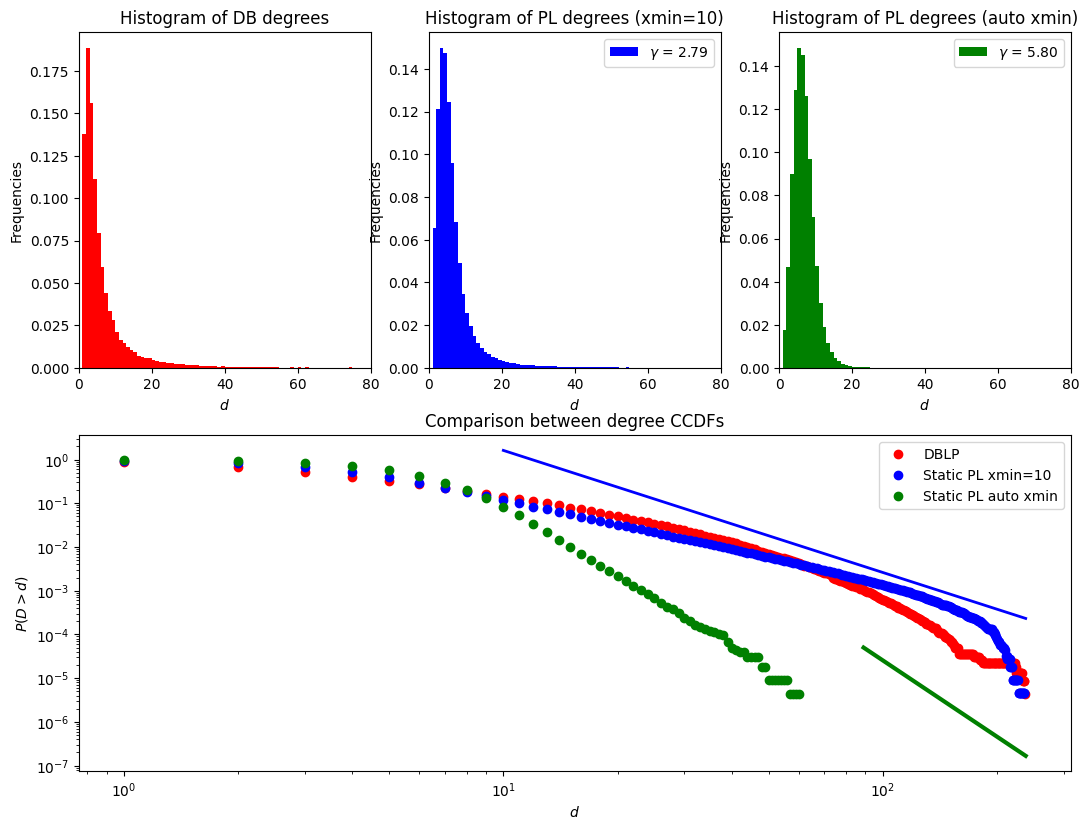

In [11]:
# we use GridSpecs for a finer control of the plot positioning
# scale the fig size twice in length
default_sizes = plt.rcParams["figure.figsize"]
fig_sizes = (2*default_sizes[0], default_sizes[1])

fig_sizes = (fig_sizes[0], 2*default_sizes[1])
f = plt.figure(figsize = fig_sizes)

# create a 2x3 Grid Specification
gs = gridspec.GridSpec(2, 3)

# add subplots to the figure, using the GridSpec gs
# position [0,0] (upper-left corner)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[0,2])
# the fourth plot spans the entire second row
ax4 = plt.subplot(gs[1,:])

# compute and plot the histogram of DB degrees
d_db = dblp_g.degree()
_,_,_ = ax1.hist(d_db, bins=range(1,max(d_db)+2), density = True, color = 'red')
_ = ax1.set_xlim(0,80)
_ = ax1.set_xlabel("$d$")
_ = ax1.set_ylabel("Frequencies")
_ = ax1.set_title("Histogram of DB degrees")

# compute and plot the histogram of Static Power Law degrees with set xmin
d_pl = pl_db.degree()
_,_,_ = ax2.hist(d_pl, bins=range(1,max(d_pl)+2), density = True, color = 'blue', label = "$\gamma$ = %.2f" % exp_pl)
_ = ax2.set_xlim(0,80)
_ = ax2.set_xlabel("$d$")
_ = ax2.set_ylabel("Frequencies")
_ = ax2.set_title("Histogram of PL degrees (xmin=%d)" % xmin)
_ = ax2.legend()

# compute and plot the histogram of Static Power law degrees with auto xmin
d_pl_auto = pl_db_auto.degree()
_,_,_ = ax3.hist(d_pl_auto, bins=range(1,max(d_pl_auto)+2), density = True, color = 'green', label = "$\gamma$ = %.2f" % exp_pl_auto)
_ = ax3.set_xlim(0,80)
_ = ax3.set_xlabel("$d$")
_ = ax3.set_ylabel("Frequencies")
_ = ax3.set_title("Histogram of PL degrees (auto xmin)")
_ = ax3.legend()

# compute and plot the degree CCDFs
db_ecdf = ECDF(d_db)
pl_ecdf = ECDF(d_pl)
pl_auto_ecdf = ECDF(d_pl_auto)
x = np.arange(1,max(d_db)+1)
_ = ax4.loglog(x, 1-db_ecdf(x), 'ro', label = 'DBLP')
x = np.arange(1,max(d_pl)+1)
_ = ax4.loglog(x, 1-pl_ecdf(x), 'bo', label = 'Static PL xmin=%d' % xmin)
x = np.arange(1,max(d_pl_auto)+1)
_ = ax4.loglog(x, 1-pl_auto_ecdf(x), 'go', label = 'Static PL auto xmin')
_ = ax4.set_xlabel("$d$")
_ = ax4.set_ylabel("$P(D>d)$")
_ = ax4.set_title("Comparison between degree CCDFs")
_ = ax4.legend(numpoints = 1)

# for reference, plot the power law functions corresponding to the fitting with fixed and automatic xmin
x1 = np.arange(xmin_auto, max(d_db)+1)
_ = ax4.loglog(x1, 10000000 * x1**(-exp_pl_auto), 'g-', linewidth = 3)
x1 = np.arange(xmin, max(d_db)+1)
_ = ax4.loglog(x1, 1000 * x1**(-exp_pl), 'b-', linewidth = 2)

## Exercise \#5

- Analyse the following aspects of the DBLP graph
    - assortativity: is the graph assortative or disassortative?
    - clustering: is the graph more or less clustered than the corresponding ER graph (random graph)?
    - shortest path length (only unweighted version): plot the distribution and the average shortest path
      - **note: compute the shortest paths using a sample of 100 origin and 100 destination nodes only**
    - community structure
      - **note: consider the subgraph of nodes with degree>=100 only**
      - plot existing communities
      - print their sizes
      - extract the subgraph of the largest community and plot it

0.2967914189832669

Text(0.5, 0, 'degree')

Text(0, 0.5, 'Neighbors degree')

Text(0.5, 1.0, '$knn$ index for DBLP')

Text(0.5, 0, 'degree')

Text(0, 0.5, 'Average degree of neighbors')

Text(0.5, 1.0, '$knnk$ index for DBLP')

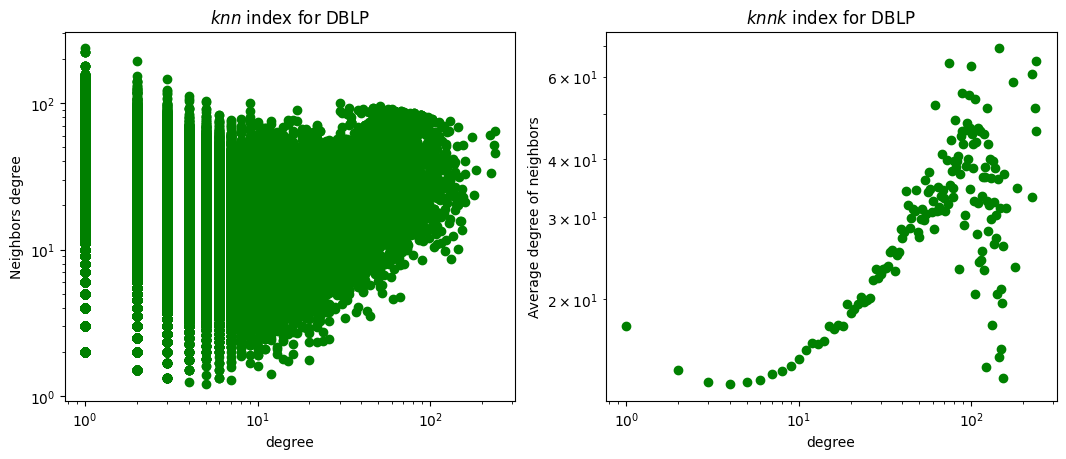

In [12]:
# assortativity
# assortativity index
dblp_g.assortativity_degree()

# The knn data. Two lists are returned
# - the list of average degrees for each node (knn)
# - the list of average degrees for each degree (knnk)
dblp_knn, dblp_knnk = dblp_g.knn()

# plotting
default_sizes = plt.rcParams["figure.figsize"]
fig_sizes = (2*default_sizes[0], default_sizes[1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = fig_sizes)
ax1.loglog(dblp_deg, dblp_knn, 'go')
ax1.set_xlabel("degree")
ax1.set_ylabel("Neighbors degree")
ax1.set_title("$knn$ index for DBLP")

ax2.loglog(range(1,max(dblp_deg)+1), dblp_knnk, 'go')
ax2.set_xlabel("degree")
ax2.set_ylabel("Average degree of neighbors")
ax2.set_title("$knnk$ index for DBLP")

In [13]:
# clustering
# global transitivity (C1)
print("Global clustering (C1): ", dblp_g.transitivity_undirected())

# average local transitivity (C2)
# mode = 0 means that nodes with less than two neighbours will have zero transitivity
print ("Local clustering (C2): ", dblp_g.transitivity_avglocal_undirected(mode="zero"))

# Clustering coefficient of the equivalent ER graph (avg_degree/#nodes)
er_cc = mean(dblp_deg)/dblp_g.vcount()
print("Clustering coefficient of the equivalent ER graph: ", er_cc)

Global clustering (C1):  0.3831866456819797
Local clustering (C2):  0.6353051038204319
Clustering coefficient of the equivalent ER graph:  2.795240795048896e-05


In [15]:
# shortest path length
src = sample(list(dblp_g.vs), 100)
trg = sample(list(dblp_g.vs), 100)

# compute the UNWEIGHTED shortest paths
# - result is a matrix, while we need an array for plotting
n_hops = dblp_g.distances(source = src, target = trg, weights = None, mode = "all")
n_hops = np.array(n_hops).flatten()

# plot
max_hops = max(n_hops)
nhops_densities, _, _ = plt.hist(n_hops, bins = range(1,max_hops+2), density = True)
_ = plt.axvline(mean(n_hops), color = 'red', linewidth = 4)
_ = plt.xlabel("# of hops")
_ = plt.ylabel("frequency")
_ = plt.title("Histogram of the DBLP path length")
_ = plt.text(max_hops+1, 0.9*max(nhops_densities), "avg sp DBLP = {:.2f}".format(mean(n_hops)),
             color = "red", horizontalalignment = "right")

# expected average shortest path for ER graphs (with exponential degree distribution)
ex_avg_sp = np.log10(dblp_g.vcount())/np.log10(2*dblp_g.ecount()/dblp_g.vcount())
_ = plt.axvline(ex_avg_sp, color = 'black', linewidth = 4)
_ = plt.text(max_hops+1, 0.8*max(nhops_densities), "avg sp ER = {:.2f}".format(ex_avg_sp),
             color = "black", horizontalalignment = "right")

TypeError: 'Graph' object is not callable

5

[16, 24, 15, 24, 37]

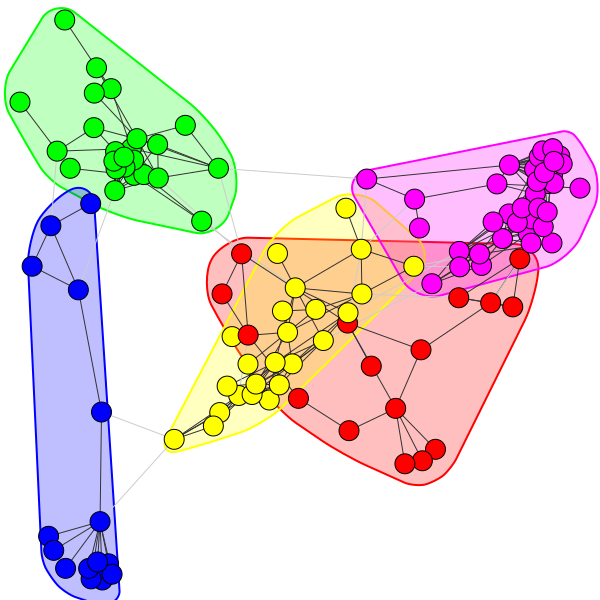

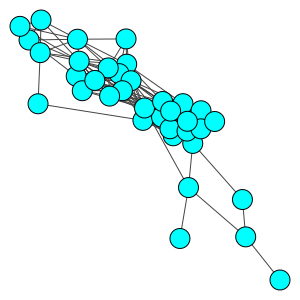

In [17]:
# community analysis

# extract the subgraph of nodes with degree >= 100
vs = dblp_g.vs.select(_degree_ge = 100)
dblp_sub = dblp_g.induced_subgraph(vs)

# giant component of the induced subgraph
dblp_sub_gc = dblp_sub.components().giant()

# Fastgreedy algorithm
vd = dblp_sub_gc.community_fastgreedy()

# The number of detected communities
vd.optimal_count

# convert to a cluster object to access additional information
vd_clust = vd.as_clustering()

# The sizes of the communities
vd_clust.sizes()

# plot
plot(vd_clust, layout=dblp_sub_gc.layout_fruchterman_reingold(), mark_groups = True)

# largest community
largest_dblp = vd_clust.giant()
plot(largest_dblp, layout = largest_dblp.layout_fruchterman_reingold(), vertex_color = "cyan", bbox = (300,300))

# Exercise \#6
- load again the example graph of Exercise #1
- select nodes with degree greater or equal than 2, and print their names
- select edges with weight lower than 0.5 and print the tuples of the nodes they connect
    - print both the id of the nodes and their names

**Hint**: see documentation and examples at https://igraph.org/python/doc/tutorial/tutorial.html#selecting-vertices-and-edges
- there is a method of the Graph class called degree(), that computes the degree of each node, and that can be called implicitly through arguments of the select() method
- there is an example to select vertices based on the degree in the documentation, look at it

In [18]:
ex_g = read("./exercise_graph.ncol", format = "ncol", directed = True)
ex_g.vs["color"] = "cyan"

vs1 = ex_g.vs.select(_degree_ge = 2)
print("Nodes with degree greater equal than 2:")
vs1["name"]

es1 = ex_g.es.select(weight_lt = 0.5)
print ("Nodes connected by edges with weight lower than 0.5:")
[e.tuple for e in es1]
[(ex_g.vs[e.source]["name"], ex_g.vs[e.target]["name"]) for e in es1]

Nodes with degree greater equal than 2:


['10', '20', '30', '40', '50', '70', '80']

Nodes connected by edges with weight lower than 0.5:


[(0, 1), (0, 2), (0, 3), (4, 5), (6, 0), (7, 6), (7, 2)]

[('10', '20'),
 ('10', '30'),
 ('10', '40'),
 ('50', '60'),
 ('70', '10'),
 ('80', '70'),
 ('80', '30')]

# Exercise \#7
- add a directed edge and an undirected edge in the graph
- add a new node and link it to an existing node
- create a new **node** attribute named $\tt{type}$,
  set its value to $\tt{old}$ for "old" nodes and $\tt{new}$ for the newly created node
- remove all edges and nodes created previously during the exercise

igraph.Edge(<igraph.Graph object at 0x000001FBC5D26C70>, 11, {'weight': '0.1'})

igraph.Edge(<igraph.Graph object at 0x000001FBC5D26C70>, 12, {'weight': '0.2'})

igraph.Edge(<igraph.Graph object at 0x000001FBC5D26C70>, 13, {'weight': '0.01'})

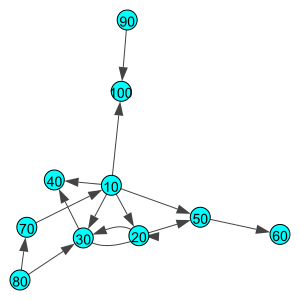

igraph.Vertex(<igraph.Graph object at 0x000001FBC5D26C70>, 10, {'name': '110', 'color': None})

igraph.Edge(<igraph.Graph object at 0x000001FBC5D26C70>, 14, {'weight': '0.1'})

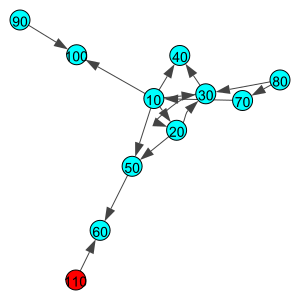

IGRAPH DNWT 11 15 -- 
+ attr: color (v), name (v), type (v), weight (e)
+ vertex attributes:
       color   name   type
[0]    cyan      10   old 
[1]    cyan      20   old 
[2]    cyan      30   old 
[3]    cyan      40   old 
[4]    cyan      50   old 
[5]    cyan      60   old 
[6]    cyan      70   old 
[7]    cyan      80   old 
[8]    cyan      90   old 
[9]    cyan     100   old 
[10]   red      110   new 
+ edges (vertex names):
        edge     weight
[0]    10->20     0.100
[1]    10->30     0.300
[2]    10->40     0.010
[3]    10->50     0.500
[4]    20->50         1
[5]    30->40     0.900
[6]    50->60     0.200
[7]    70->10     0.300
[8]    80->70     0.020
[9]    80->30     0.100
[10]   90->100        1
[11]   20->30     0.100
[12]   30->20     0.200
[13]   10->100    0.010
[14]   110->60    0.100


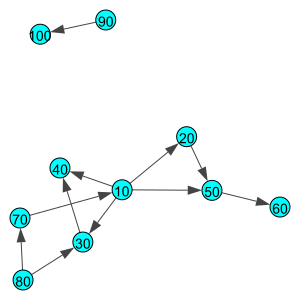

In [19]:
# directed edge between nodes 20 and 30, and undirected edge between nodes 10 and 100
ex_g.add_edge("20", "30", weight="0.1")
ex_g.add_edge("30", "20", weight="0.2")
ex_g.add_edge("10", "100", weight="0.01")
plot(ex_g, layout = ex_g.layout_fruchterman_reingold(), vertex_label = ex_g.vs["name"], bbox = (300,300))

# new vertices, with name "110", linked to node "60"
ex_g.add_vertex("110")
id = ex_g.vs.find(name_eq = '110').index
ex_g.vs[id]["color"] = "red"
ex_g.add_edge("110", "60", weight="0.1")
plot(ex_g, layout = ex_g.layout_fruchterman_reingold(), vertex_label = ex_g.vs["name"], bbox = (300,300))

# attribute type
ex_g.vs["type"] = "old"
ex_g.vs[id]["type"] = "new"
summary(ex_g, verbosity = 1, edge_list_format = "edgelist", print_vertex_attributes=True, print_edge_attributes=True)

# clean up and restore to initial configuration
ex_g.delete_edges([("20","30"), ("30","20"), ("10", "100")])
ex_g.delete_vertices("110")
plot(ex_g, layout = ex_g.layout_fruchterman_reingold(), vertex_label = ex_g.vs["name"], bbox = (300,300))

## Exercise \#8

- Partition the graph, if needed either adding new nodes/edges or removing edges to create multiple components
- Print the number of components, their sizes, and the membership of vertices in them
- Extract the giant component as a subgraph


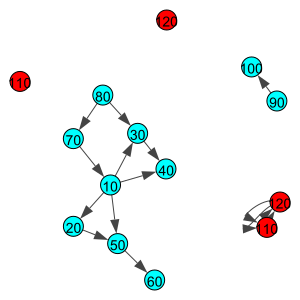

5

[8, 2, 2, 1, 1]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 4]

IGRAPH DNWT 8 10 -- 
+ attr: color (v), name (v), type (v), weight (e)
+ edges (vertex names):
       edge    weight
[0]   10->20    0.100
[1]   10->30    0.300
[2]   10->40    0.010
[3]   10->50    0.500
[4]   20->50        1
[5]   30->40    0.900
[6]   50->60    0.200
[7]   70->10    0.300
[8]   80->70    0.020
[9]   80->30    0.100


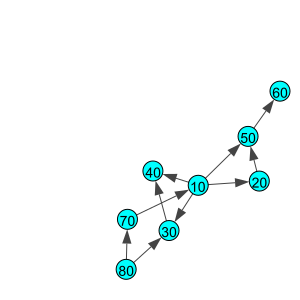

In [21]:
# create one (more) disconnected component
ex_g.add_vertices(["110", "120"])
ex_g.add_edges([("110","120"),("120","110")])
plot(ex_g, layout = ex_g.layout_fruchterman_reingold(), vertex_label = ex_g.vs["name"], bbox = (300,300))

# Compute the connected components in the graph
ex_g_conn_comp = ex_g.components(mode = "WEAK")
# the number of components
len(ex_g_conn_comp)
# the sizes of the clusters
ex_g_conn_comp.sizes()
# the membership of vertices in the clusters
ex_g_conn_comp.membership

# the Giant Componet (the biggest cluster)
ex_g_GC = ex_g_conn_comp.giant()
summary(ex_g_GC, verbosity = 1, edge_list_format = "edgelist")
plot(ex_g_GC, layout = ex_g.layout_fruchterman_reingold(), vertex_label = ex_g_GC.vs["name"], bbox = (300,300))

## Exercise \#9

- Print the degree of all nodes
- Print the neighbours of all nodes of the graph

In [22]:
# degree of the nodes
ex_deg = ex_g.degree(mode = "all")
ex_deg

# neighbours of all nodes
neig = ex_g.neighborhood(ex_g.vs, order = 1, mode="all")
neig

[5, 2, 3, 2, 3, 1, 2, 2, 1, 1, 4, 4, 0, 0]

[[0, 1, 2, 3, 4, 6],
 [1, 0, 4],
 [2, 0, 3, 7],
 [3, 0, 2],
 [4, 0, 1, 5],
 [5, 4],
 [6, 0, 7],
 [7, 2, 6],
 [8, 9],
 [9, 8],
 [10, 11],
 [11, 10],
 [12],
 [13]]